# Exploratory Notebook

# Business Understanding

## Business Context
Our company is entering the competitive movie production industry by establishing a new movie studio. With major corporations increasingly investing in original video content, we need to strategically position ourselves to maximize our chances of box office success.

## Primary Stakeholder
**Head of New Movie Studio** - The key decision-maker who will use our analysis to guide the studio's content creation strategy and investment decisions.

## Key Business Questions

### 1. **What genres are most profitable?**
   - Which movie genres consistently generate the highest box office returns?
   - Are there emerging genres showing strong growth potential?

### 2. **What budget ranges optimize ROI?**
   - What is the relationship between production budget and box office performance?
   - What budget sweet spot maximizes return on investment?

### 3. **When should we release our films?**
   - Which months/seasons show the strongest box office performance?
   - How can we avoid oversaturated release periods?

## Business Objectives
- **Primary Goal:** Identify the most profitable film characteristics to guide our initial movie productions
- **Success Metrics:** Maximize box office revenue and return on investment
- **Risk Mitigation:** Minimize financial losses by avoiding poorly-performing film categories

## Data Requirements & Analysis Considerations

### Dataset Specifications Needed:
1. **What movie data do we have access to?** (Box office numbers, budgets, genres, release dates, ratings, etc.)
2. **What time period does our data cover?** (Recent years only, or historical data?)
3. **Is it domestic box office, international, or worldwide gross?**

### Business Context Clarifications:
4. **What size studio are we targeting?** (Independent/small budget vs. major studio competitor?)
5. **Are there any genre restrictions?** (Family-friendly only, or open to all ratings?)
6. **Geographic focus?** (Domestic US market, international, or global?)

### Analysis Scope Considerations:
7. **Should we consider streaming/digital revenue or just theatrical box office?**
8. **Do we want to analyze competitor studios' strategies?**
9. **Should seasonal trends consider COVID-19 impact on recent years?**

## Success Metrics Framework
**Primary Metrics:**
- **Gross Revenue:** Total box office performance
- **Return on Investment (ROI):** (Revenue - Budget) / Budget × 100
- **Profit Margins:** Net profit as percentage of revenue
- **Budget Efficiency:** Revenue per dollar invested

**Secondary Metrics:**
- **Market Share:** Performance relative to industry
- **Risk Assessment:** Variance in returns by category
- **Audience Reach:** Ticket sales and demographic penetration

## Recommended Visualizations Strategy

### 1. **Genre Analysis**
- **Horizontal Bar Chart:** Average revenue by genre (easy comparison)
- **Box Plot:** Revenue distribution by genre (shows variability and outliers)
- **Scatter Plot:** Budget vs. Revenue by genre (profitability insights)

### 2. **Budget Optimization**
- **Scatter Plot with Trend Line:** Budget vs. ROI (sweet spot identification)
- **Histogram:** Distribution of profitable budget ranges
- **Bubble Chart:** Budget vs. Revenue (bubble size = profit margin)

### 3. **Release Timing**
- **Line Graph:** Monthly box office performance over time
- **Heatmap:** Revenue by month and genre combination
- **Seasonal Bar Chart:** Quarterly performance comparison

### 4. **Risk vs. Reward Analysis**
- **Risk-Return Scatter Plot:** Average return vs. standard deviation by category
- **Waterfall Chart:** Success rate breakdown by film characteristics

## Expected Deliverables
Three concrete, data-driven recommendations that the Head of Movie Studio can immediately implement in the studio's content strategy and production planning.

# Data Understanding

`bom.movie_gross.csv.gz` dataset from Box Office Mojo contains the revenue data for various films. It contains the following five columns:

- **title**: movie title
- **studio**: producing studio
- **domestic_gross**: domestic gross earnings in USD
- **foreign_gross**: international gross earnings
- **year**: year film was released

`im` database from IMDb (Internet Movie Database) contains information about the movies and those who worked on them. It contains eight tables with the following fields:
- `directors` table contains the directors. It contains the following two fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **person_id**: director's ID (as per IMDb)
- `known_for` table contains the notable works for each person. It contains the following two fields:
    - **person_id**: unique person ID (as per IMDb)
    - **movie_id**: unique movie ID (as per IMDb)
- `movie_akas` table contains the alternative titles of the movies. It contains the following eight fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **ordering**: order in which movie title appears
    - **title**: alternative title for the movie
    - **region**: country code where movie was shown
    - **language**: language code of the movie
    - **types**: type of alternative title
    - **attributes**: special attributes of the movie
    - **is_original_title**: shows whether alternative title is the origianl title (1 = original title, 0 = alternative title)
- `movie_basics` table contains basic information about the movies. It contains the following six fields:
    - **movie_id**: unique identifier for the movie (as per IMDb)
    - **primary_title**: official title of the movie
    - **original_title**: official title of the movie in the original language
    - **start_year**: year when the movie was released
    - **runtime_minutes**: duration of the movie in minutes
    - **genres**: genre(s) of the movie
- `movie_ratings` table contains the ratings movies were given by IMDb. It contains the following three fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **averagerating**: average IMDb rating
    - **numvotes**: number of votes received
- `persons` table contains records of those involved in the movies. It has the following five fields:
    - **person_id**: unique identifier for the person (as per IMDb)
    - **primary_name**: full name of the person
    - **birth_year**: year of birth
    - **death_year**: year of death (if dead)
    - **primary_profession**: role in the movie
- `principals` table contains the information of the main cast and crew. It has the following five fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **ordering**: order of person in credits
    - **person_id**: unique person ID (as per IMDb)
    - **category**: role played
    - **job**: specific role
    - **characters**: character name
- `writers` table contains the following two fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **person_id**: writer's ID (as per IMDb)

`rt.movie_info.tsv.gz` dataset from Rotten Tomatoes contains general information about the movies. It contains the following twelve columns:
- **id**: unique movie ID (as per Rotten Tomatoes)
- **synopsis**: short summary of the movie
- **rating**: Motion Picture Association of America(MPAA) Rating
- **genre**: genre(s) of the movie
- **director**: name of the director(s)
- **writer**: name of the writer(s)
- **theater_date**: date released in theaters
- **dvd_date**: date released in DVD format
- **currency**: currency symbol
- **box_office**: total revenue from box office
- **runtime**: movie duration in minutes
- **studio**: producing studios

`rt.reviews.tsv.gz` dataset from Rotten Tomatoes contains review information about movies. It contains the following eight columns:
- **id**: unique movie ID (as per Rotten Tomatoes)
- **review**: review text
- **rating**: rating given by critic
- **fresh**: categorization of the review (fresh = positive, rotten = negative)
- **critic**: name of the critic
- **top_critic**: highlights if a critic is regarded as a Top Critic by Rotten Tomatoes (1 = top critic, 0 = not a top critic)
- **publisher**: publication name
- **date**: date of the review

`tmdb.movies.csv.gz` from The Movie Database (TMDb) contains movie and rating informations about various movies. It contains the following nine columns:
- **genre_ids**: list of genre(s) for the movie
- **id**: unique movie ID (as per TMDb)
- **original_language**: language code for the movie
- **original_title**: title of the movie in the official language
- **popularity**: popularity score (as per TMDb)
- **relaease_date**: release date in theatres
- **title**: movie title
- **vote_average**: average user rating
- **vote_count**: total votes received

`tn.movie_budgets.csv.gz` from The Numbers dataset contains movie budget and revenue information. It has the following six columns:
- **id**: unique movie ID (as per The Numbers)
- **release_date**: release date in theatres
- **movie**: movie title
- **production_budget**: budget used (in USD)
- **domestic_gross**: revenue generated from country of origin (in USD)
- **worldwide_gross**: total revenue generated worldwide (in USD)


In [50]:
#importing relevant libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
import sqlite3


## Loading the Data sets

In [51]:
#going through SQl
def load_tables(connection):
    table_names = pd.read_sql(
        "SELECT name FROM sqlite_master WHERE type='table';", connection
    )["name"].tolist()
    sql_tables = {
        table_name: pd.read_sql(f"SELECT * FROM {table_name}", connection)
        for table_name in table_names
    }
    return sql_tables

path = '../Data/im.db'
conn = sqlite3.connect(path)

imdb_tables = load_tables(conn)

print(imdb_tables.keys())


dict_keys(['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers'])


In [52]:
bom_movie = pd.read_csv("../Data/bom.movie_gross.csv")
rt_info = pd.read_csv("../Data/rt.movie_info.tsv", sep='\t', encoding='latin1')
rt_reviews = pd.read_csv("../Data/rt.movie_info.tsv", sep='\t', encoding='latin1')
tmdb_df = pd.read_csv("../Data/tmdb.movies.csv")
tn_budget = pd.read_csv("../Data/tn.movie_budgets.csv")

## SQL CLEANING AND MERGING

In [53]:
movie_basics = imdb_tables['movie_basics']
movie_basics.shape
movie_basics.head()
movie_basics.info()
movie_basics.describe()
print(movie_basics.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


# Movie Basics

In [54]:
movie_basics_cp = movie_basics.copy(deep=True)

movie_basics_cp['original_title'] = movie_basics_cp['original_title'].fillna('Unknown')

movie_basics_median = movie_basics_cp['runtime_minutes'].median()

movie_basics_cp['runtime_minutes'] = movie_basics_cp['runtime_minutes'].fillna(movie_basics_median)

movie_basics_cp['genres'] = movie_basics_cp['genres'].fillna("Unknown")

In [55]:
print(movie_basics_cp.isna().sum())
movie_basics_cp.shape

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


(146144, 6)

In [56]:
movie_basics_cp['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027])

<Axes: xlabel='start_year'>

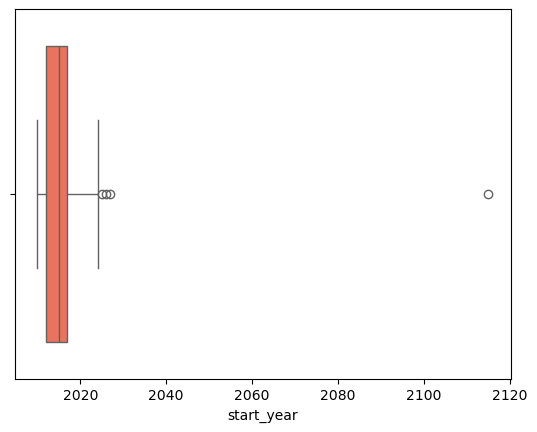

In [57]:
sns.boxplot(x= movie_basics_cp['start_year'], color='tomato')

In [58]:
movie_basics_cp = movie_basics_cp[movie_basics_cp['start_year'] < 2025]
movie_basics_cp.shape



(146140, 6)

<Axes: xlabel='runtime_minutes'>

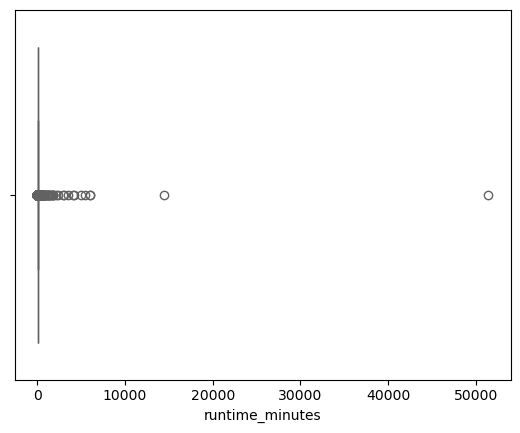

In [59]:
sns.boxplot(x= movie_basics_cp['runtime_minutes'], color='tomato')

In [60]:
runtime = movie_basics_cp['runtime_minutes'].sort_values(ascending=True)
runtime


95787         1.0
113278        1.0
93214         1.0
72190         1.0
98755         1.0
           ...   
88717      5460.0
87264      6000.0
123467     6017.0
44840     14400.0
132389    51420.0
Name: runtime_minutes, Length: 146140, dtype: float64

In [61]:
movie_basics_cp = movie_basics_cp[movie_basics_cp['runtime_minutes'].between(40, 150)]
movie_basics_cp.duplicated().sum()

np.int64(0)

In [62]:
movie_ratings = imdb_tables['movie_ratings']
movie_ratings.shape
movie_ratings.head()
movie_ratings.describe()
movie_ratings.info()
movie_ratings.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [63]:
movie_ratings_cp = movie_ratings.copy(deep=True)

In [64]:
print(imdb_tables['movie_basics'].shape)
print(imdb_tables['movie_ratings'].shape)


print(imdb_tables['movie_akas'].shape)

(146144, 6)
(73856, 3)
(331703, 8)


In [65]:
movie_akas = imdb_tables['movie_akas']

In [66]:
movie_akas_cp = movie_akas.copy(deep=True)
movie_akas_cp.info()
movie_akas_cp.isna().sum()
movie_akas_cp = movie_akas_cp.drop(columns=['language', 'types', 'attributes', 'is_original_title'])
movie_akas_cp = movie_akas_cp.rename(columns={
    'title':'region_title'
})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


# MOVIE MERGE

In [67]:
movie_merge = movie_basics_cp.merge(movie_ratings_cp, on='movie_id', how='inner')
movie_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
2,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.1,32
...,...,...,...,...,...,...,...,...
72222,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
72223,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
72224,tt9914642,Albatross,Albatross,2017,87.0,Documentary,8.5,8
72225,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,87.0,Unknown,6.6,5


In [68]:
movie_merge = movie_merge.merge(movie_akas_cp, on='movie_id', how='inner')
movie_merge = movie_merge.drop_duplicates()

movie_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,region_title,region
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,1,One Day Before the Rainy Season,XWW
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,2,Ashad Ka Ek Din,IN
2,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,3,One Monsoon Day,None
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,4,Ashad Ka Ek Din,None
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,10,La otra cara del viento,VE
...,...,...,...,...,...,...,...,...,...,...,...
256559,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,2,Sisterleaf,IN
256560,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,3,Pengalila,IN
256561,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,1,Padmavyuhathile Abhimanyu,None
256562,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,2,Pathmavyuhathile Abhimanyu,IN


## PEOPLES MERGE

In [69]:
print(imdb_tables['persons'].shape)
print(imdb_tables['directors'].shape)
print(imdb_tables['known_for'].shape)
print(imdb_tables['writers'].shape)

(606648, 5)
(291174, 2)
(1638260, 2)
(255873, 2)


In [70]:
persons_cp= imdb_tables["persons"].copy(deep=True)
persons_cp

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [71]:
persons_cp.shape
persons_cp.head()
persons_cp.info()
persons_cp.describe()
print(persons_cp.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64


In [72]:
persons_cp['primary_profession'].fillna('unknown')
persons_cp.isnull().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

In [73]:
persons_cp = persons_cp.drop(columns=['birth_year', 'death_year'])

In [74]:
persons_cp

,person_id,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...,...
606643,nm9990381,Susan Grobes,actress
606644,nm9990690,Joo Yeon So,actress
606645,nm9991320,Madeline Smith,actress
606646,nm9991786,Michelle Modigliani,producer


In [75]:
directors = imdb_tables['directors']
directors.shape
directors.isna().any()
directors.duplicated().sum()
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [76]:
directors_cp = directors.copy(deep=True)

In [77]:
people_merge = persons_cp.merge(directors_cp, on='person_id', how='inner')
people_merge

,person_id,primary_name,primary_profession,movie_id
0,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt1592569
1,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt1592569
2,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt1592569
3,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt1592569
4,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt8421806
...,...,...,...,...
291166,nm9980896,Rama Narayanan,"director,writer",tt8715016
291167,nm9980896,Rama Narayanan,"director,writer",tt8919136
291168,nm9981679,Samir Eshra,"director,writer,cinematographer",tt8717234
291169,nm9993380,Pegasus Envoyé,"director,actor,writer",tt8743182


In [78]:
known_for = imdb_tables['known_for']
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [79]:
people_merge1 = people_merge.merge(known_for, on=['person_id', 'movie_id'], how='left')
people_merge1

,person_id,primary_name,primary_profession,movie_id
0,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt1592569
1,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt1592569
2,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt1592569
3,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt1592569
4,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt8421806
...,...,...,...,...
291166,nm9980896,Rama Narayanan,"director,writer",tt8715016
291167,nm9980896,Rama Narayanan,"director,writer",tt8919136
291168,nm9981679,Samir Eshra,"director,writer,cinematographer",tt8717234
291169,nm9993380,Pegasus Envoyé,"director,actor,writer",tt8743182


In [80]:
writers = imdb_tables['writers']
writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [81]:
writers_cp = writers.copy(deep=True)

people_merge1 = people_merge1.merge(writers_cp, on=['movie_id', 'person_id'], how='left')
people_merge1 = people_merge1.drop_duplicates()

In [82]:
people_merge1

,person_id,primary_name,primary_profession,movie_id
0,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt1592569
4,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt8421806
6,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt2057445
9,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt2590280
10,nm0064023,Bryan Beasley,"director,producer,writer",tt4512140
...,...,...,...,...
1051232,nm9971456,Zheng Wei,director,tt8697720
1051233,nm9980896,Rama Narayanan,"director,writer",tt8715016
1051235,nm9980896,Rama Narayanan,"director,writer",tt8919136
1051236,nm9981679,Samir Eshra,"director,writer,cinematographer",tt8717234


In [83]:
final_df = movie_merge.merge(people_merge1, on='movie_id', how='left')
final_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,region_title,region,person_id,primary_name,primary_profession
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,1,One Day Before the Rainy Season,XWW,nm0002411,Mani Kaul,"director,writer,actor"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,2,Ashad Ka Ek Din,IN,nm0002411,Mani Kaul,"director,writer,actor"
2,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,3,One Monsoon Day,None,nm0002411,Mani Kaul,"director,writer,actor"
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,4,Ashad Ka Ek Din,None,nm0002411,Mani Kaul,"director,writer,actor"
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,10,La otra cara del viento,VE,nm0000080,Orson Welles,"actor,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296294,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,2,Sisterleaf,IN,nm0151535,T.V. Chandran,"director,writer,actor"
296295,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,3,Pengalila,IN,nm0151535,T.V. Chandran,"director,writer,actor"
296296,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,1,Padmavyuhathile Abhimanyu,None,nm10536451,Vineesh Aaradya,"writer,director"
296297,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,2,Pathmavyuhathile Abhimanyu,IN,nm10536451,Vineesh Aaradya,"writer,director"


In [84]:
final_df.columns

final_df = final_df.rename(columns={
    'movie_id': 'movie_id',
    'primary_title': 'title',
    'original_title': 'original_title',
    'start_year': 'release_year',
    'runtime_minutes': 'runtime_min',
    'genres': 'genres',
    'averagerating': 'imdb_rating',
    'numvotes': 'imdb_votes',
    'region_title': 'alt_title',
    'region': 'release_region',
    'person_id': 'person_id',
    'primary_name': 'person_name',
    'primary_profession': 'person_profession'
})

final_df = final_df.drop(columns='ordering')

print(final_df.columns)


Index(['movie_id', 'title', 'original_title', 'release_year', 'runtime_min',
       'genres', 'imdb_rating', 'imdb_votes', 'alt_title', 'release_region',
       'person_id', 'person_name', 'person_profession'],
      dtype='object')


#  Q1.Genre Analysis

In [85]:
# Remove duplicates
final_df_cp = final_df.drop_duplicates(subset = "movie_id")
final_df_cp

,movie_id,title,original_title,release_year,runtime_min,genres,imdb_rating,imdb_votes,alt_title,release_region,person_id,person_name,person_profession
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season,XWW,nm0002411,Mani Kaul,"director,writer,actor"
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,La otra cara del viento,VE,nm0000080,Orson Welles,"actor,director,writer"
17,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13,Subse Bada Sukh,IN,nm0611531,Hrishikesh Mukherjee,"director,editor,writer"
20,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,La Telenovela Errante,None,nm0749914,Raoul Ruiz,"director,writer,producer"
30,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.1,32,Bigfoot,US,nm6883878,Mc Jones,"actor,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296285,tt9899860,Watching This Movie Is a Crime,Didan in film jorm ast,2019,100.0,"Drama,Thriller",8.1,7,Watching This Movie Is a Crime,XWW,nm10531298,Reza Zehtabchian,"director,writer"
296288,tt9899880,Columbus,Columbus,2018,85.0,Comedy,5.8,5,Columbus,None,nm5971240,Hatef Alimardani,"director,writer,producer"
296290,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5,BADMEN with a good behavior,DE,nm10532891,Loco Meisenkaiser,"director,actor,writer"
296293,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,Pengalila,None,nm0151535,T.V. Chandran,"director,writer,actor"


In [86]:
# final_df_cp_splitting the genres column
final_df_cp_cp = final_df_cp.copy(deep = True)
final_df_cp_cp["genres"] = final_df_cp_cp['genres'].str.split(",")
final_df_cp_exploded = final_df_cp_cp.explode("genres")
final_df_cp_exploded.drop(columns = ["release_region", "person_id","person_name", "person_profession"], inplace = True)
final_df_cp_exploded = final_df_cp_exploded[final_df_cp_exploded["genres"] != "Unknown"]


In [87]:
# Cleaning tn_budget
tn_budget['production_budget'] = tn_budget['production_budget'].replace('[\$,]', '', regex = True).astype(int)
tn_budget['domestic_gross'] = tn_budget['domestic_gross'].replace('[\$,]', '', regex = True).astype(int)
tn_budget['worldwide_gross'] = tn_budget['worldwide_gross'].replace('[\$,]', '', regex = True).astype('int64')

# Feature Engineering
tn_budget["total_gross"] = tn_budget['domestic_gross'] + tn_budget['worldwide_gross']
tn_budget['profit/loss'] = tn_budget['total_gross'] - tn_budget['production_budget']

In [88]:
tn_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit/loss
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,288977,282977
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2676,-2324
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,-1400


In [89]:
indiv_movie_genres = final_df_cp_exploded.merge(tn_budget, left_on = "title", right_on= "movie", how = "inner")
indiv_movie_genres = indiv_movie_genres.drop_duplicates(subset = ["title", "production_budget"])

combined_movie_genres = final_df_cp.merge(tn_budget, left_on = "title", right_on= "movie", how = "inner")
combined_movie_genres = combined_movie_genres.drop_duplicates(subset = ["title", "production_budget"])

In [90]:
# Top 10 genres generating the most revenue
indiv_genre_profit = indiv_movie_genres.groupby("genres")['profit/loss'].mean()
indiv_genre_profit = indiv_genre_profit.round(2).sort_values(ascending = False)
indiv_genre_profit = pd.DataFrame(indiv_genre_profit)
indiv_genre_profit = indiv_genre_profit.head(10)

combined_genre_profit = combined_movie_genres.groupby("genres")['profit/loss'].mean()
combined_genre_profit = combined_genre_profit.round(2).sort_values(ascending = False)
combined_genre_profit = pd.DataFrame(combined_genre_profit)
combined_genre_profit = combined_genre_profit.head(10)
combined_genre_profit

,profit/loss
genres,
"Adventure,Drama,Sport",1.523208e+09
Adventure,8.381998e+08
"Adventure,Drama,Sci-Fi",7.757051e+08
"Comedy,Mystery",7.609286e+08
"Action,Adventure,Sci-Fi",6.532604e+08
"Adventure,Fantasy",5.092863e+08
"Drama,Family,Fantasy",4.931971e+08
"Comedy,Romance,Sci-Fi",4.919102e+08
"Action,Adventure,Animation",4.789828e+08


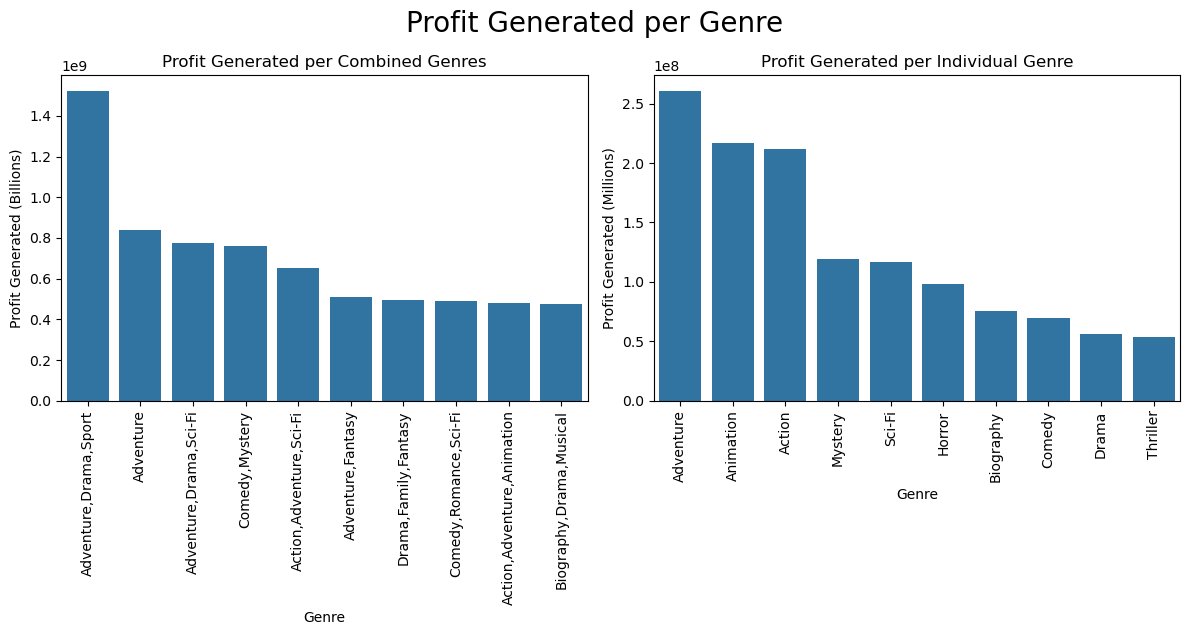

In [91]:
fig,axis = plt.subplots(ncols = 2, figsize = (12,6))

# Unexploded Genre set
sns.barplot(data=combined_genre_profit, x="genres", y="profit/loss", ax=axis[0])
axis[0].set_title("Profit Generated per Combined Genres")
axis[0].set_xlabel("Genre")
axis[0].set_ylabel("Profit Generated (Billions)")
axis[0].tick_params(axis='x', rotation=90)

# Exploded Genre set
sns.barplot(data=indiv_genre_profit, x="genres", y="profit/loss", ax=axis[1])
axis[1].set_title("Profit Generated per Individual Genre")
axis[1].set_xlabel("Genre")
axis[1].set_ylabel("Profit Generated (Millions)")
axis[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.suptitle("Profit Generated per Genre", fontsize = 20, y = 1.05);


## Interpretation

Combining genres seems to be an emerging trend to attract a bigger audience.

### Combined Genres

From the top 10 combined genres, we can see that **adventure-drama-sport** combo generated the most profit.

It is also noted that the `Adventure` genre appears in six out of the ten times genres were combined.

### Individual Genres
In terms individual genres, `Adventure` stands out generating a profit of over 2.5 million USD. 

It is followed closely by `Animation` and `Action` who also genreated a profit of over 2 million USD.

In [92]:
combined_genre_count = final_df_cp["genres"].value_counts().head(10)
indiv_genre_count = final_df_cp_exploded["genres"].value_counts().head(10)

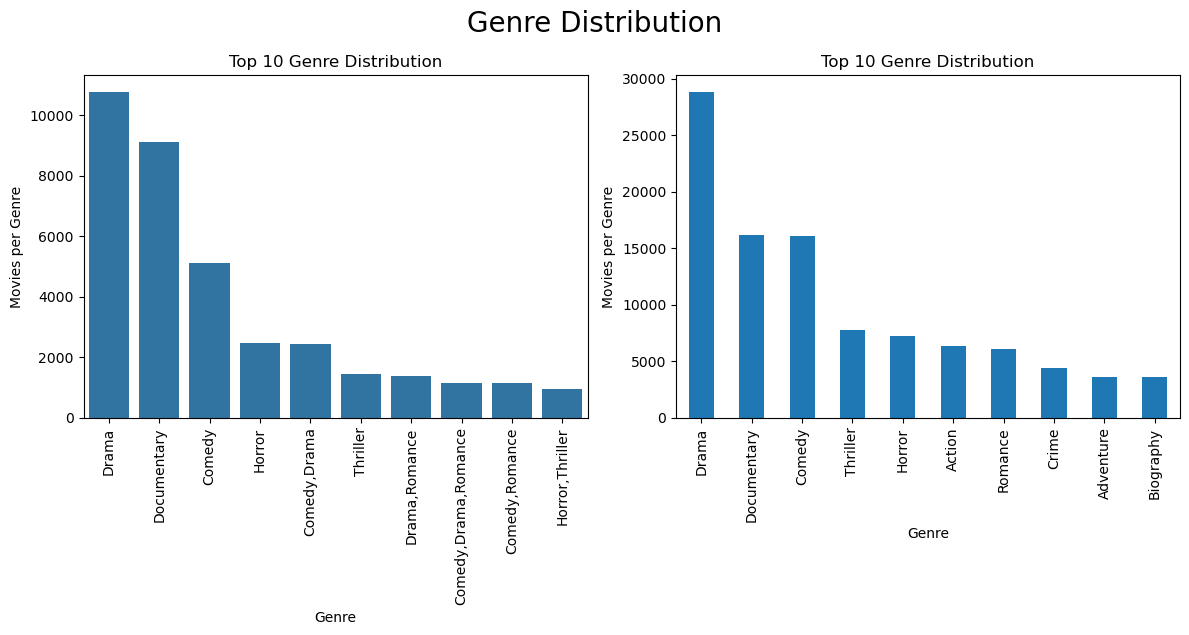

In [93]:
# Genre Distribution in final_df
fig,axis = plt.subplots(ncols = 2, figsize = (12,6))

sns.countplot(data = final_df_cp, x = "genres", order = combined_genre_count.index, ax = axis[0])
axis[0].set_title("Top 10 Genre Distribution")
axis[0].set_ylabel("Movies per Genre")
axis[0].set_xlabel("Genre")
axis[0].tick_params(axis = "x", rotation = 90)


indiv_genre_count.plot(kind = "bar", ax = axis[1])
axis[1].set_title("Top 10 Genre Distribution")
axis[1].set_ylabel("Movies per Genre")
axis[1].set_xlabel("Genre")
axis[1].tick_params(axis = "x", rotation = 90)

plt.tight_layout()
plt.suptitle("Genre Distribution", fontsize = 20, y = 1.05);

## Interpretation

In both combined and individual genres, `Drama`, `Documentary` and `Comedy` are more prevalent in the dataset than the others.

`Comedy and Drama` combination is the most prevalent combination in the dataset.

In [94]:
combined_genre_ratings = final_df_cp.groupby("genres")["imdb_rating"].mean()
combined_genre_ratings = combined_genre_ratings.round(1).sort_values(ascending = False)
combined_genre_ratings = pd.DataFrame(combined_genre_ratings)
combined_genre_ratings = combined_genre_ratings[combined_genre_ratings["imdb_rating"] >= 8.0].head(10)
combined_genre_ratings

indiv_genre_ratings = final_df_cp_exploded.groupby("genres")["imdb_rating"].mean()
indiv_genre_ratings = indiv_genre_ratings.round(1).sort_values(ascending = False).head(20)
indiv_genre_ratings = pd.DataFrame(indiv_genre_ratings)

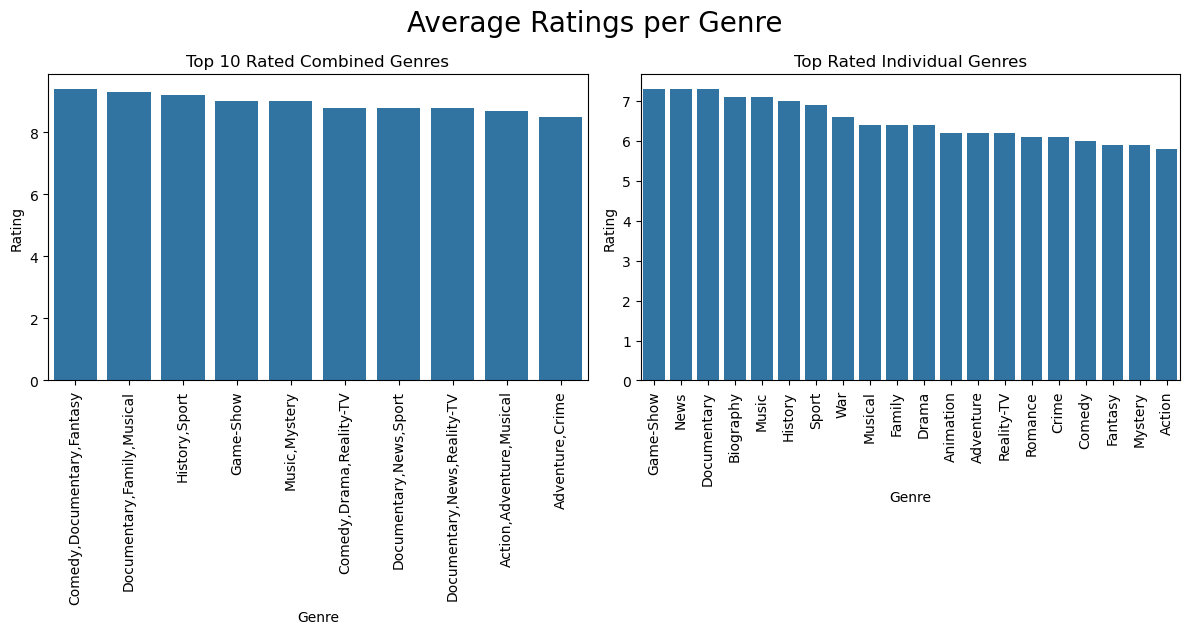

In [95]:
# Average ratings per genre
fig,axis = plt.subplots(ncols = 2, figsize = (12,6))

sns.barplot(data = combined_genre_ratings, x = "genres", y = 'imdb_rating', ax = axis[0])
axis[0].tick_params(axis = "x", rotation = 90)
axis[0].set_title("Top 10 Rated Combined Genres")
axis[0].set_ylabel("Rating")
axis[0].set_xlabel("Genre");

sns.barplot(data = indiv_genre_ratings, x = "genres", y = 'imdb_rating', ax = axis[1])
axis[1].tick_params(axis = "x", rotation = 90)
axis[1].set_title("Top Rated Individual Genres")
axis[1].set_ylabel("Rating")
axis[1].set_xlabel("Genre");

plt.tight_layout()
plt.suptitle("Average Ratings per Genre", fontsize = 20, y = 1.05);


## Interpretation

Combining genres is a great way to improve the rating of movies.

Individually, the highest rating for a movie is 7.3 and Game Shows, News and Documentary lead the pack.
A lot of viewers prefer non-fiction movies as shown where News, Documentary, Biography, History, Sport and War all appear in the top-most rated individual genres.

It is worth noting that Game Shows are highly-rated being the only individual genre to show up in the combined-genre section.

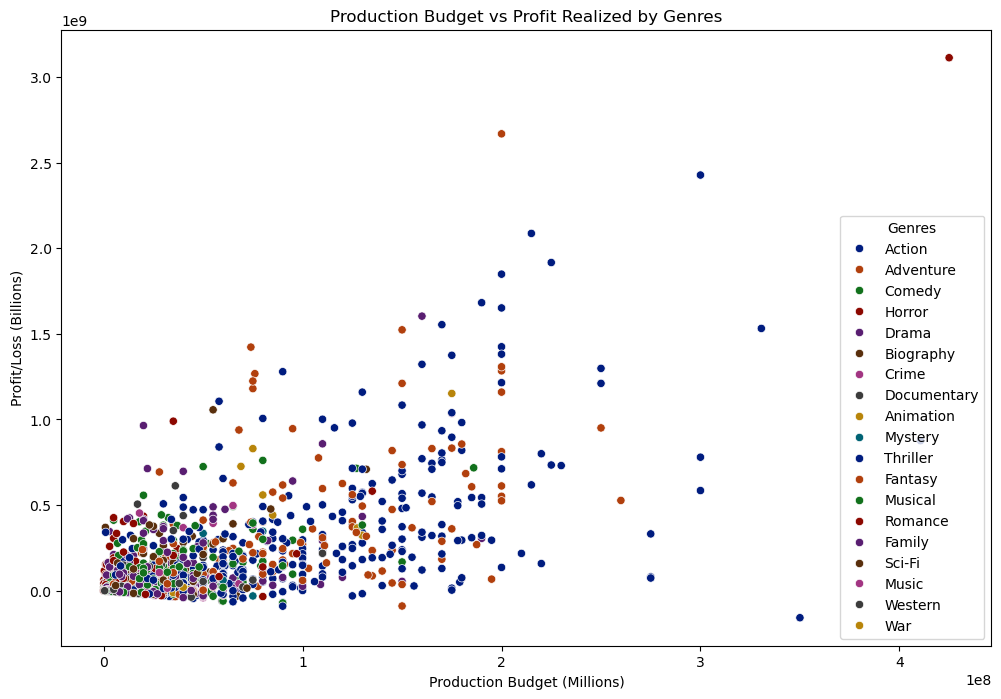

In [96]:
# Production Budget vs Profit Realized
# Hue = Genres
# Production Budget vs Profit Realized
# Hue = Genres
plt.figure(figsize = (12,8))
sns.scatterplot(data = indiv_movie_genres, y = "profit/loss", x = "production_budget", hue = "genres", palette = "dark")
plt.ylabel("Profit/Loss (Billions)")
plt.xlabel("Production Budget (Millions)")
plt.title("Production Budget vs Profit Realized by Genres")
plt.legend(title = "Genres");

## Interpretation
 There is no obvious strong correlation between the production budget and the profits realized from the movie. A high production budget does not necesssarily mean that the movie will be a success.

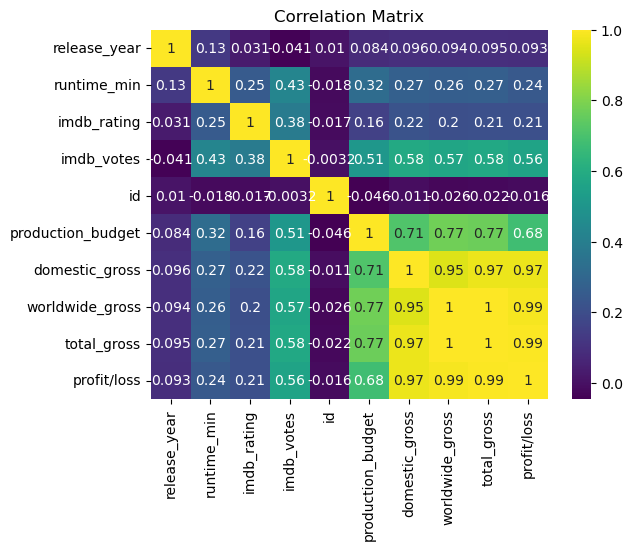

In [98]:
sns.heatmap(indiv_movie_genres.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

### Interpretation
- Profit/loss versus total revenue/total gross(Worldwide gross and domestic gross) have a strong positive correlation at 0.99. This means movies with high gross earnings tend to be more profitable which is expected.

- Profit/loss versus production budget have a relatively positive correlation at 0.68 and in comparison with total revenue/gross, we can say that higher budget movies tend to have higher profits but not as strong as revenue does.

- Imdb votes with total gross and production budget correlates at 0.58 and 0.51 respectively, telling us that movies that more people vote for tend to earn more and also have higher budgets.

- Imdb rating has a low correlation with profit and loss, at 0.21. Hence, do not determine the financial success of a movie.

- It is important to note that imdb votes matter more than imdb ratings. 

- The release year does not determine the profitability and success of a movie.

- Longer movies as denoted in the runtime minutes does not guarantee high profitability as well.